### Team Pluto


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset=pd.read_csv('pakistanproperty.csv')

## print shape of dataset with rows and columns
dataset.head()

,ID,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agence,agent,area.1,area unit,month,day,year
0,0,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0,Marla,7,10,2019
1,1,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,Ettemad Enterprises,Balqiaz Marwat,6.2,Marla,5,5,2019
2,2,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,1.0,Kanal,10,19,2018
3,3,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,Crown Associate,Abrar Ahmed,1.0,Kanal,6,27,2019
4,4,Flat,35000000,Diplomatic Enclave,Islamabad,Islamabad Capital,33.728873,73.119628,3,7.1 Marla,For Sale,3,Al Sahar Estate,Zahid H. Usmani,7.1,Marla,6,3,2019


#### Shape of Data

In [ ]:
dataset.info()

#### Summary Statistics of Numerical Data

In [ ]:
dataset.describe()

### Here we will check the percentage of nan values present in each feature
#### 1 -step make the list of features which has missing values
#### 2- step print the feature name and the percentage of missing values

In [ ]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>=1]


for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

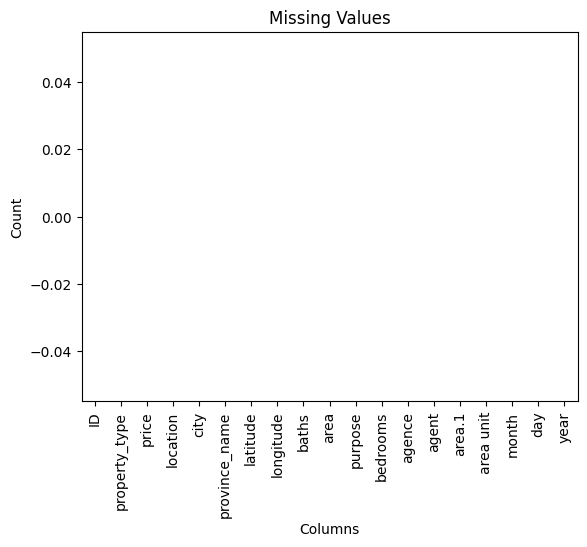

In [ ]:
missing_values = dataset.isnull().sum()
missing_values.plot(kind='bar')
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [ ]:
dataset.columns

Index(['ID', 'property_type', 'price', 'location', 'city', 'province_name',
       'latitude', 'longitude', 'baths', 'area', 'purpose', 'bedrooms',
       'agence', 'agent', 'area.1', 'area unit', 'month', 'day', 'year'],
      dtype='object')

### List of numerical variables

In [ ]:

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

dataset[numerical_features].head()

Number of numerical variables:  10


,ID,price,latitude,longitude,baths,bedrooms,area.1,month,day,year
0,0,7000000,33.492591,73.301339,3,3,8.0,7,10,2019
1,1,7800000,33.698244,72.984238,2,2,6.2,5,5,2019
2,2,50000000,33.540894,73.095732,7,7,1.0,10,19,2018
3,3,40000000,33.679211,72.988787,5,5,1.0,6,27,2019
4,4,35000000,33.728873,73.119628,3,3,7.1,6,3,2019


#### Distribution of Price in the Dataset

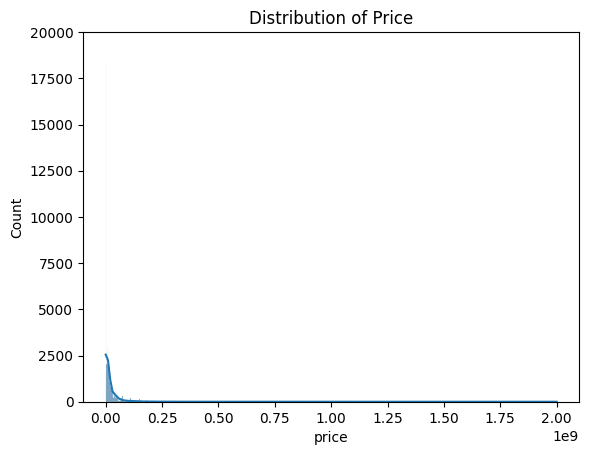

In [ ]:
sns.histplot(data=dataset, x='price', kde=True)
plt.title('Distribution of Price')

plt.ylim(0, 20000)
plt.show()


#### Plotting Pairwise Relationship Visualization in the dataset to visualize the relationship between the features.

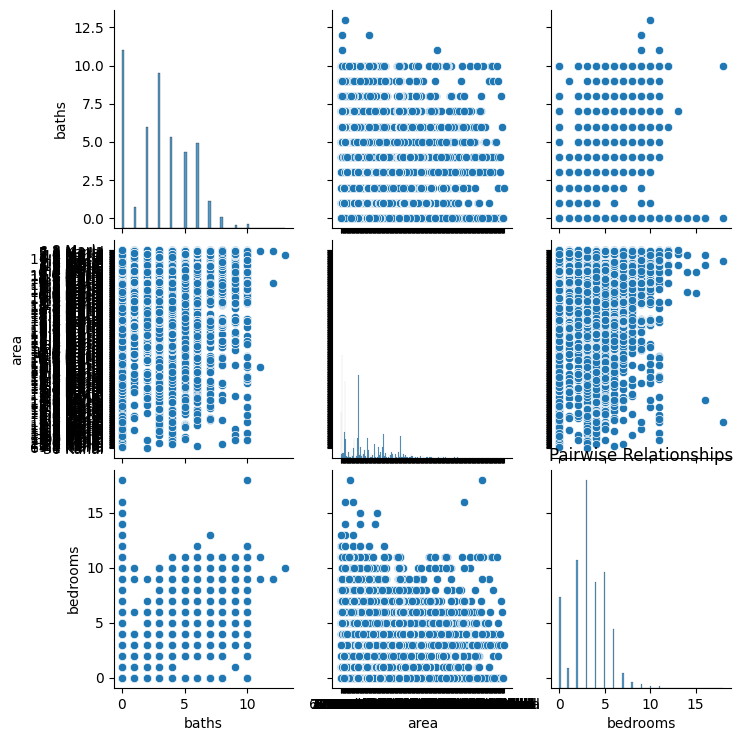

In [ ]:
sns.pairplot(data=dataset, vars=['baths', 'area', 'bedrooms'])
plt.title('Pairwise Relationships')
plt.show()

#### Plotting a Box Plot to check the distribution of price in comparison with different features.

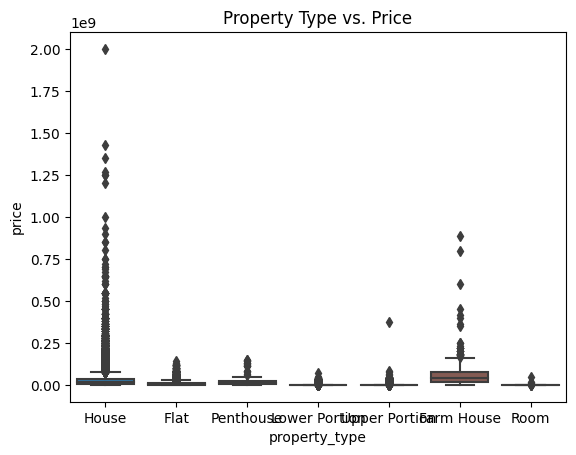

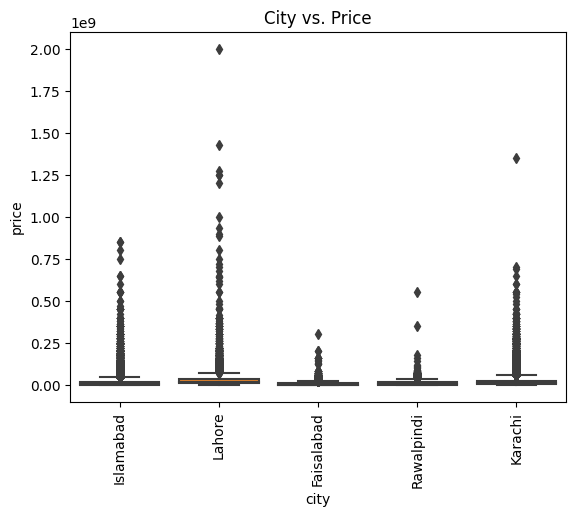

In [ ]:
sns.boxplot(data=dataset, x='property_type', y='price')
plt.title('Property Type vs. Price')
plt.show()

sns.boxplot(data=dataset, x='city', y='price')
plt.title('City vs. Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
dataset.columns

Index(['ID', 'property_type', 'price', 'location', 'city', 'province_name',
       'latitude', 'longitude', 'baths', 'area', 'purpose', 'bedrooms',
       'agence', 'agent', 'area.1', 'area unit', 'month', 'day', 'year'],
      dtype='object')

In [ ]:
len(dataset['city'].unique())

5

#### Median price of all the properties grouped by Cities

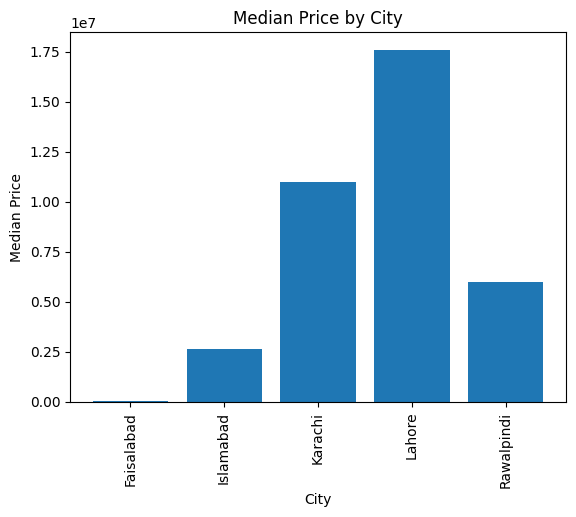

In [ ]:
a=dataset.groupby('city')['price'].median()
plt.bar(a.index, a.values)

# Customize the plot
plt.title('Median Price by City')
plt.xlabel('City')
plt.ylabel('Median Price')
plt.xticks(rotation=90)

plt.show()


In [ ]:
a= dataset.groupby('location')['price'].median()
a.shape

(981,)

#### Median price of all the properties grouped by Number of Bedrooms

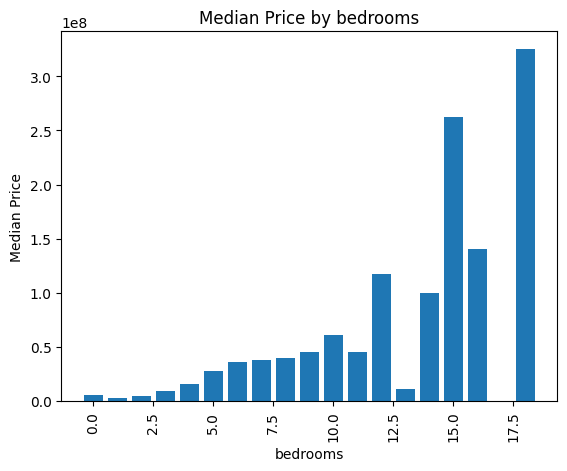

In [ ]:
a=dataset.groupby('bedrooms')['price'].median()
plt.bar(a.index, a.values)

# Customize the plot
plt.title('Median Price by bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Median Price')
plt.xticks(rotation=90)

plt.show()


In [ ]:
# Discrete features:
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique()) <25 ]
discrete_features

['baths', 'bedrooms', 'month', 'year']

### Relationship between numerical features and the target variable

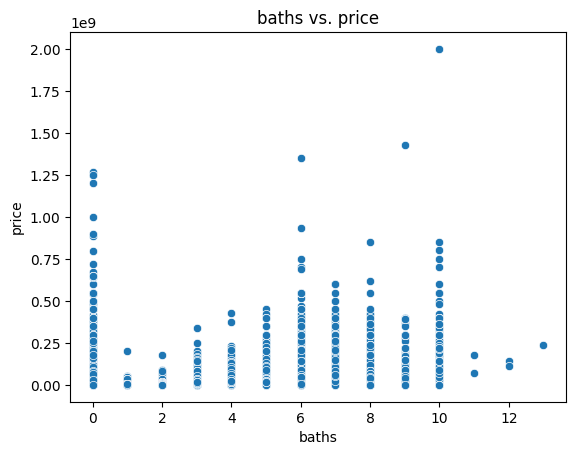

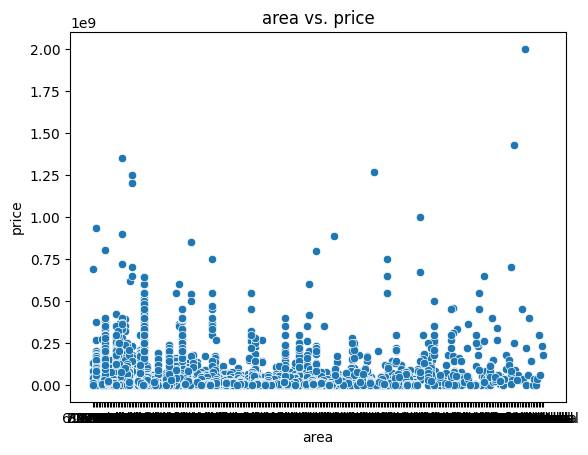

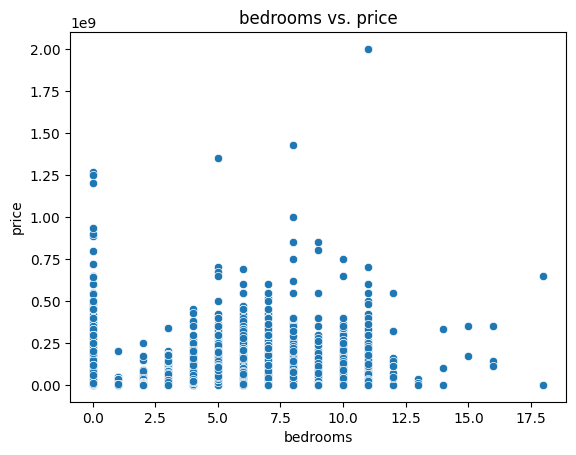

In [ ]:
numeric_features = ['baths', 'area', 'bedrooms']
target_variable = 'price'

for feature in numeric_features:
    sns.scatterplot(data=dataset, x=feature, y=target_variable)
    plt.title(f'{feature} vs. {target_variable}')
    plt.show()


### Distribution of categorical features

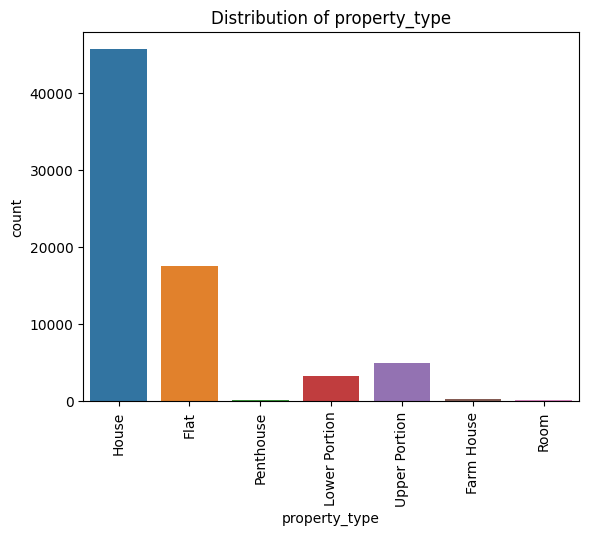

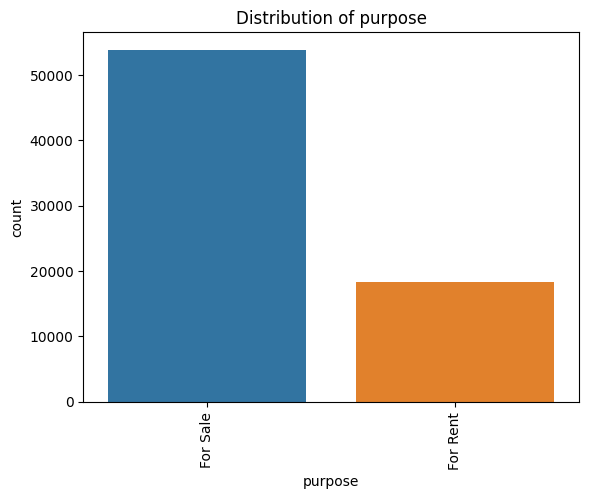

In [ ]:
categorical_features = ['property_type', 'purpose']

for feature in categorical_features:
    sns.countplot(data=dataset, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

### Relationship between categorical features and the target variable

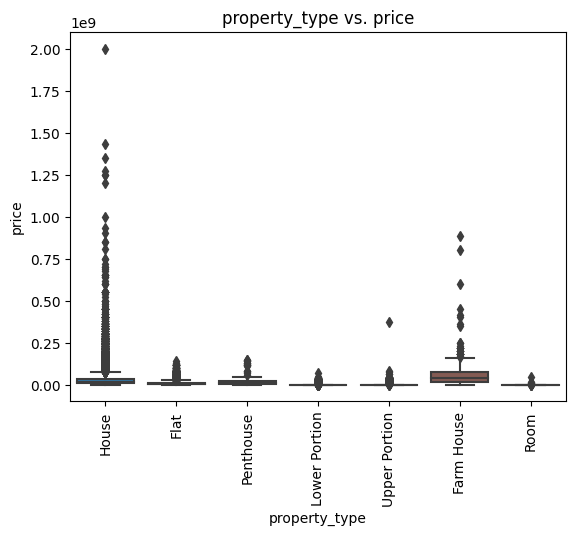

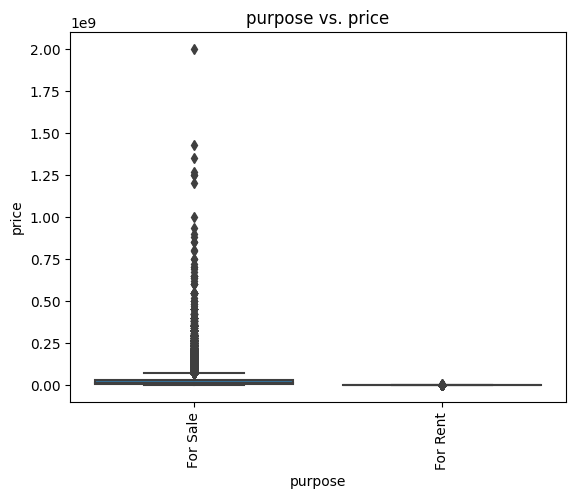

In [ ]:
categorical_features = ['property_type', 'purpose']
target_variable = 'price'

for feature in categorical_features:
    sns.boxplot(data=dataset, x=feature, y=target_variable)
    plt.title(f'{feature} vs. {target_variable}')
    plt.xticks(rotation=90)
    plt.show()

### Correlations between numerical features

C:\Users\Hp\AppData\Local\Temp\ipykernel_16572\2094765284.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset[numeric_features].corr()


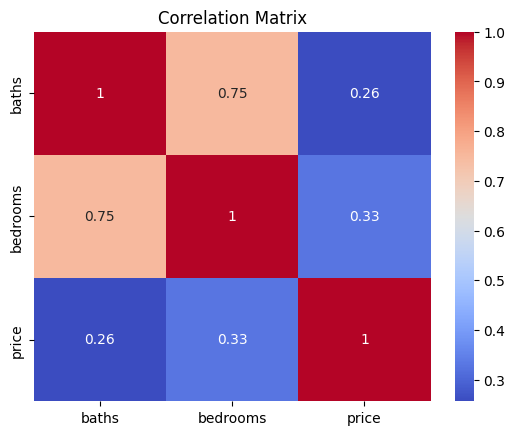

In [ ]:
numeric_features = ['baths', 'area', 'bedrooms', 'price']

correlation_matrix = dataset[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
dataset.columns

Index(['ID', 'property_type', 'price', 'location', 'city', 'province_name',
       'latitude', 'longitude', 'baths', 'area', 'purpose', 'bedrooms',
       'agence', 'agent', 'area.1', 'area unit', 'month', 'day', 'year'],
      dtype='object')

In [ ]:
X = dataset.drop(['ID', 'price', 'location', 'latitude', 'longitude', 'month', 'day', 'year'], axis=1)
X.head()

,property_type,city,province_name,baths,area,purpose,bedrooms,agence,agent,area.1,area unit
0,House,Islamabad,Islamabad Capital,3,8 Marla,For Sale,3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0,Marla
1,Flat,Islamabad,Islamabad Capital,2,6.2 Marla,For Sale,2,Ettemad Enterprises,Balqiaz Marwat,6.2,Marla
2,House,Islamabad,Islamabad Capital,7,1 Kanal,For Sale,7,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,1.0,Kanal
3,Penthouse,Islamabad,Islamabad Capital,5,1 Kanal,For Sale,5,Crown Associate,Abrar Ahmed,1.0,Kanal
4,Flat,Islamabad,Islamabad Capital,3,7.1 Marla,For Sale,3,Al Sahar Estate,Zahid H. Usmani,7.1,Marla


#### ML Model

#### Data was one-hot encoded and irrelevant features removed.
City:
Islamabad 0
Lahore 1
Karachi 2
Rawalpindi 3
Faisalabad 4

Province:
Islamabad 0
Sindh 1
Punjab 2

purpose:
for sale 0
for rent 1

property type:
house 0
flat 1
Penthouse 2
lower portion 3
upper portion 4
farm house 5


#### Feature Engineering

Area and Unit (Marla, Kanal) was converted into a single feature Area in Marla by multiplying Kanal values by 20

In [2]:
#Importing Encoded Data
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras import regularizers

%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


data = pd.read_csv("pakistanproperty_encoded.csv")


data.head()

,ID,price,property_type,city,province_name,latitude,longitude,baths,purpose,bedrooms,month,day,year,area in marla,area.1,area unit
0,0,7000000,0,0,0,33.492591,73.301339,3,0,3,7,10,2019,8.0,8.0,Marla
1,1,7800000,1,0,0,33.698244,72.984238,2,0,2,5,5,2019,6.2,6.2,Marla
2,2,50000000,0,0,0,33.540894,73.095732,7,0,7,10,19,2018,20.0,1.0,Kanal
3,3,40000000,2,0,0,33.679211,72.988787,5,0,5,6,27,2019,20.0,1.0,Kanal
4,4,35000000,1,0,0,33.728873,73.119628,3,0,3,6,3,2019,7.1,7.1,Marla


In [4]:
data.isna().sum()

ID               0
price            0
property_type    0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
month            0
day              0
year             0
area in marla    0
area.1           0
area unit        0
dtype: int64

In [5]:
X = data.iloc[:, 2:14].values
y = data.iloc[:, 1].values


print(f"First 5 elements of X:\n {X[:5]}")
print(f"First 5 elements of y: {y[:5]}")

First 5 elements of X:
 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3492591e+01 7.3301339e+01
  3.0000000e+00 0.0000000e+00 3.0000000e+00 7.0000000e+00 1.0000000e+01
  2.0190000e+03 8.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 3.3698244e+01 7.2984238e+01
  2.0000000e+00 0.0000000e+00 2.0000000e+00 5.0000000e+00 5.0000000e+00
  2.0190000e+03 6.2000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3540894e+01 7.3095732e+01
  7.0000000e+00 0.0000000e+00 7.0000000e+00 1.0000000e+01 1.9000000e+01
  2.0180000e+03 2.0000000e+01]
 [2.0000000e+00 0.0000000e+00 0.0000000e+00 3.3679211e+01 7.2988787e+01
  5.0000000e+00 0.0000000e+00 5.0000000e+00 6.0000000e+00 2.7000000e+01
  2.0190000e+03 2.0000000e+01]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 3.3728873e+01 7.3119628e+01
  3.0000000e+00 0.0000000e+00 3.0000000e+00 6.0000000e+00 3.0000000e+00
  2.0190000e+03 7.1000000e+00]]
First 5 elements of y: [ 7000000  7800000 50000000 40000000 35000000]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (57724, 12)
y_train shape:  (57724,)
X_test shape:  (14432, 12)
y_test shape:  (14432,)


In [16]:
# Build the neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="relu"))

# Compile the model
model.compile(loss="mse", optimizer="adam")

In [17]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1804/1804 [==============================] - 12s 6ms/step - loss: 1844570610466816.0000
Epoch 2/100
1804/1804 [==============================] - 11s 6ms/step - loss: 1772781842726912.0000
Epoch 3/100
1804/1804 [==============================] - 10s 5ms/step - loss: 1365919590776832.0000
Epoch 4/100
1804/1804 [==============================] - 10s 5ms/step - loss: 1249247743705088.0000
Epoch 5/100
1804/1804 [==============================] - 11s 6ms/step - loss: 1127425425539072.0000
Epoch 6/100
1804/1804 [==============================] - 11s 6ms/step - loss: 1016578829189120.0000
Epoch 7/100
1804/1804 [==============================] - 11s 6ms/step - loss: 951863805476864.0000
Epoch 8/100
1804/1804 [==============================] - 11s 6ms/step - loss: 911806860099584.0000
Epoch 9/100
1804/1804 [==============================] - 10s 5ms/step - loss: 857476731764736.0000
Epoch 10/100
1804/1804 [==============================] - 11s 6ms/step - loss: 811035183284224.0000
Epo

451/451 [==============================] - 2s 3ms/step
MAE: 8019095.745471489
MSE: 440388190321499.75
RMSE: 20985428.047135465
VarScore: 0.73558288056863


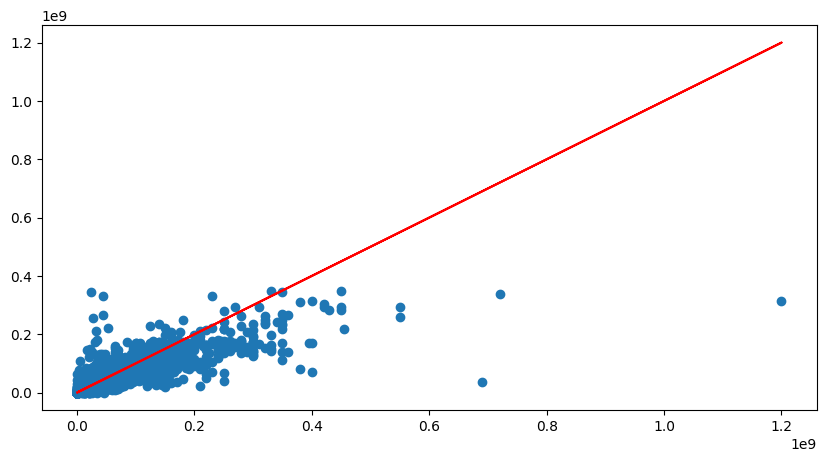

In [18]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [19]:
submitDF = pd.DataFrame(y_pred)
submitDF

,0
0,50956096.0
1,9552292.0
2,0.0
3,0.0
4,43691300.0
...,...
14427,85706560.0
14428,28493196.0
14429,8949788.0
14430,17377716.0


In [20]:
submitDF.to_csv('teamPluto.csv')